In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load fashion-MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

location = r""
X_test, y_test = load_mnist(location, kind='t10k')

X_test = X_test/255

X_train, y_train = load_mnist(location)

X_train = X_train/255

print(np.max(X_test))
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

1.0
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
train_mask = np.isin(y_train, [3, 6, 7])
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = np.isin(y_test, [3, 6, 7])
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(y_train)
print(y_test)

X_train = np.random.permutation(X_train)
y_train = np.random.permutation(y_train)
X_test = np.random.permutation(X_test)
y_test = np.random.permutation(y_test)

print(y_train)
print(y_test)

[3 7 7 ... 6 7 3]
[6 6 7 ... 3 7 6]
[7 3 7 ... 3 3 3]
[6 6 6 ... 3 7 7]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_test_scaled = sc.fit_transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_test_pca = pca.fit_transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_test, y_test)



[0.39292144 0.1534286 ]


c:\Users\Dylan\anaconda3\envs\jupyter_notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


--------------------------------------------------------------------------------------------

## 2. Implementing DBSCAN clustering for classes of '3', '6', and '7' of fashion-MNIST dataset:


(16) Firstly, use the DBSCAN clustering algorithm to cluster the test images directly by setting the eps parameter to 0.3 and the min_sample to 5. And then apply DBSCAN to cluster the first 2 PCA components of the test images by setting the eps parameter to 0.3 and the min_sample to 5.
Visualize the clustering results in two subplots for each k value and also print out the numbers of estimated clusters. [2 marks]




In [13]:
from sklearn.cluster import DBSCAN
X_test_dbscan = DBSCAN(eps=1, min_samples=5).fit(X_test_pca)

dbscan_labels = X_test_dbscan.labels_


print(f"dbscan labels: {dbscan_labels}")
print(f"dbscan length: {len(dbscan_labels)}")
print(f"dbscan max: {max(dbscan_labels)}")
print(f"dbscan min: {min(dbscan_labels)}")

n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

dbscan labels: [0 0 0 ... 0 0 0]
dbscan length: 3000
dbscan max: 0
dbscan min: -1
Estimated number of clusters: 1
Estimated number of noise points: 6


In [6]:
from sklearn import metrics

print(f"Silhouette Coefficient: {metrics.silhouette_score(X_test_pca, dbscan_labels):.3f}")

Silhouette Coefficient: -0.037


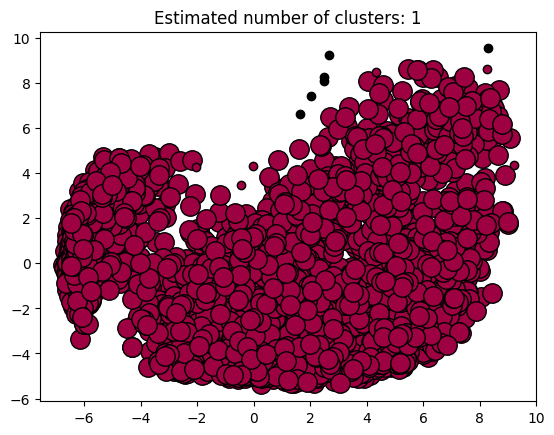

In [14]:
unique_labels = set(dbscan_labels)
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[X_test_dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dbscan_labels == k

    xy = X_test_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_test_pca[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [18]:
import itertools
import matplotlib.cm as cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors

feature_1 = [item[0] for item in X_test_pca]
feature_2 = [item[1] for item in X_test_pca]

data = pd.DataFrame({
    'Feature1': feature_1,
    'Feature2': feature_2
})

gray = [0.5, 0.5, 0.5, 1]

colors = cm.nipy_spectral(np.linspace(0.15, 0.85, len(np.unique(dbscan_labels))))

colors[-1] = gray

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)




data['Colour'] = [colors[index] for index in dbscan_labels]

data['Label'] = [f"Cluster {index+1}" for index in dbscan_labels]

data['Cluster'] = dbscan_labels


data = data.sort_values('Cluster')

indexer = []
i = 1
for _ in dbscan_labels:
    indexer += [i]
    i += 1

data['Index'] = indexer

#print(data)

reshaped_data = []

for x in data['Index']:
    reshaped_data += [data['Feature1'].values[x-1], data['Feature2'].values[x-1], data['Colour'].values[x-1], data['Label'].values[x-1]]

print(reshaped_data)


[np.float64(1.0389675355556578), np.float64(3.284720477085331), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(7.840192962540259), np.float64(6.4453897862885166), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(-2.049899119343672), np.float64(4.2468166796410625), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(0.1993459746316831), np.float64(-2.195274551436977), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(-2.440027431764183), np.float64(-2.7222855006083355), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(4.360078057046865), np.float64(1.036489194574196), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(8.658877450181269), np.float64(6.529522417929802), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(8.374098895769581), np.float64(7.301801885500616), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(3.4641678479956264), np.float64(1.7795714038038704), array([0.5, 0.5, 0.5, 1. ]), 'Cluster 0', np.float64(3.8635326995552), np.float64(5.0701728515

In [20]:
plt.figure(figsize=(10, 6))
for x in reshaped_data:
    plt.scatter(x=x[0], y=x[1], color=x[2], label=x[3], s=80)
#sns.scatterplot(data=data, x='Feature1', y='Feature2', s=80)
plt.title('Cluster Visualization')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True)
plt.show()

IndexError: invalid index to scalar variable.

<Figure size 1000x600 with 0 Axes>